# <center> <font color="red"> Administración Activa vs Administración Pasiva del Capita </font>



<img src="http://oci02.img.iteso.mx/identidad_de_instancia_2018/ITESO/Logos%20ITESO/Logo-ITESO-Principal.jpg">

<center><font color= #F3465> <font size = 6>Microestructura y Sistemas de Trading.</font> </font> <br><br>
<Strong> <font size = 3> Laboratoria No. : </font> </Strong> 1<br><br>
<Strong> <font size = 3> Profesor: </font> </Strong>Francisco Muñoz<br><br>
<Strong> <font size = 3> Fecha de entrega:  </font> </Strong> 15 de Septiembre de 2019<br><br>
<Strong> <font size = 3> Integrantes: </font> </Strong> 
<center> Axel Munguía

<center> Esteban Navarrete

<center> Alejandro Preciado

<center> José Antonio Quintero

**Situación**

Acabas de entrar a trabajar a una operadora de fondos de inversión como analista financiero dentro de la mesa de análisis del mercado de renta variable. En la junta trimestral se plantea la posibilidad de crear un fondo propio con exposición al mercado de valores de USA tratando de replicar a los ETFs conocidos como ishares que la empresa BlackRock ofrece.

La idea es replicar un ETF con posiciones en directo. Te han asignado la tarea de hacer un ejercicio simple de replicar la construcción de un portafolio de inversión y un criterio de rebalanceo lo más parecido a un ETF de ishares que tu selecciones. Esto con la finalidad de comparar los resultados de haber rebalanceado periódicamente el portafolio, ó, no haberlo hecho y continuar todo un año con las mismas posiciones.

### ETF a utilizar: iShares Core S&P 500 ETF

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web 
from IPython.display import IFrame
import IPython
style.use("ggplot")

# Análisis de S&P 500 ETF (Febrero 2018)

In [2]:
# Cabecera del ETF
data = pd.read_csv("../Datos/Febrero_2018.csv",skiprows=10)
data_ = data.iloc[:-2,:]
data_.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.93,178.12,"34,128,429.00","6,078,955,773.48","6,078,955,773.48",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,3.11,93.77,"51,279,537.00","4,808,482,184.49","4,808,482,184.49",Information Technology,2588173,US5949181045,NASDAQ
2,AMZN,AMAZON COM INC,Equity,2.60,"1,512.45","2,658,635.00","4,021,052,505.75","4,021,052,505.75",Consumer Discretionary,2000019,US0231351067,NASDAQ
3,FB,FACEBOOK CLASS A INC,Equity,1.83,178.32,"15,851,657.00","2,826,667,476.24","2,826,667,476.24",Information Technology,B7TL820,US30303M1027,NASDAQ
4,JPM,JPMORGAN CHASE & CO,Equity,1.72,115.5,"23,063,215.00","2,663,801,332.50","2,663,801,332.50",Financials,2190385,US46625H1005,New York Stock Exchange Inc.


In [3]:
# Cola del ETF
data_.tail()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
503,RRC,RANGE RESOURCES CORP,Equity,0.01,13.29,"1,502,148.00","19,963,546.92","19,963,546.92",Energy,2523334,US75281A1097,New York Stock Exchange Inc.
504,UA,UNDER ARMOUR INC CLASS C,Equity,0.01,15.05,"1,179,518.00","17,751,745.90","17,751,745.90",Consumer Discretionary,BDF9YM2,US9043112062,New York Stock Exchange Inc.
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ


In [4]:
data.tail() # Si no se remueven los últimos dos valores

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
505,PDCO,PATTERSON COMPANIES INC,Equity,0.01,31.58,"558,448.00","17,635,787.84","17,635,787.84",Health Care,2672689,US7033951036,NASDAQ
506,CHK,CHESAPEAKE ENERGY CORP,Equity,0.01,2.82,"6,038,886.00","17,029,658.52","17,029,658.52",Energy,2182779,US1651671075,New York Stock Exchange Inc.
507,NWS,NEWS CORP CLASS B,Equity,0.01,16.4,"791,807.00","12,985,634.80","12,985,634.80",Consumer Discretionary,BBGVT51,US65249B2088,NASDAQ
508,ESH8,S&P500 EMINI MAR 18,Futures,0.00,"2,714.40","5,669.00",0,"769,396,680.00",Cash and/or Derivatives,-,-,Index And Options Market
509,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data_.shape

(508, 12)

In [6]:
data_.dtypes # Conocer el tipo de cada columna

Ticker             object
Name               object
Asset Class        object
Weight (%)        float64
Price              object
Shares             object
Market Value       object
Notional Value     object
Sector             object
SEDOL              object
ISIN               object
Exchange           object
dtype: object

**Conocer la frecuencia de cada Sector presente en el ETF**

In [7]:
# Nos autentificamos para poder realizar plots con la librería plotly.
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls
tls.set_credentials_file(username='AxelMunguia',api_key='gBH6UcAyUKdKaDosQlYk')

In [8]:
Sector = data_["Sector"].value_counts()
Sector

Consumer Discretionary     84
Industrials                70
Information Technology     68
Financials                 67
Health Care                61
Consumer Staples           34
Real Estate                33
Energy                     32
Utilities                  28
Materials                  25
Telecommunications          3
Cash and/or Derivatives     3
Name: Sector, dtype: int64

In [9]:
trace=go.Bar(x=Sector,y=Sector.index.values, name='Frecuencia de cada Sector en ETF',text=Sector.index.values,orientation="h")
layout= dict(title='Frecuencia de cada Sector en ETF', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

**Tipos de Activos que componen el  ETF**

In [10]:
Class = data_["Asset Class"].value_counts()
Class

Equity                         505
Money Market                     1
Cash Collateral and Margins      1
Cash                             1
Name: Asset Class, dtype: int64

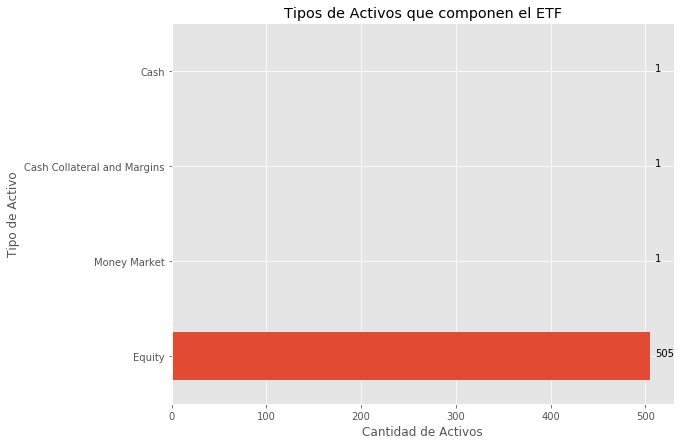

In [11]:
Class.plot(kind="barh",figsize=(9,7))
for k in range(4):
    plt.text(510,k,Class[k])
plt.title("Tipos de Activos que componen el ETF")
plt.xlabel("Cantidad de Activos")
plt.ylabel("Tipo de Activo")
plt.show()

**Conocer la ponderación de los activos (Frecuencia)**

In [12]:
Pesos = data_["Weight (%)"].values.tolist()
Pesos.sort()
Pesos[:10] # De manera Ascendente

[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02]

In [13]:
trace=go.Histogram(x=Pesos, name="Ponderación de Activos en ETF")
layout= dict(title="Ponderación de Activos en ETF", xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))
fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

**Información general por Sector**

In [14]:
Prom_Sector = pd.DataFrame(data_.groupby(["Sector"]).mean())
Sec = pd.DataFrame(data_.Sector.value_counts())
Merge = pd.merge(left=Prom_Sector,right=Sec,left_on=Prom_Sector.index.values,right_on=Sec.index.values)
Merge

,key_0,Weight (%),Sector
0,Cash and/or Derivatives,0.166667,3
1,Consumer Discretionary,0.150714,84
2,Consumer Staples,0.220588,34
3,Energy,0.170625,32
4,Financials,0.222239,67
5,Health Care,0.224918,61
6,Industrials,0.145714,70
7,Information Technology,0.368235,68
8,Materials,0.115600,25
9,Real Estate,0.078485,33


In [15]:
trace=go.Bar(x=Prom_Sector.values,y=Prom_Sector.index.values, name='Ponderación Promedio por Sector',text=Prom_Sector.index.values,orientation="h")
layout= dict(title='Ponderación Promedio por Sector', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=False))


fig=dict(data = [trace],layout=layout)
py.iplot(fig,filename='Data')

### <center> Predominación de activos en el portafolio.                                                                   <center> ¿Qué porcentaje de activos tienen más del 50% de presencia en el portafolio?

In [16]:
# Conocer si los activos están ordandos de manera decreciente en el dataset
orden = np.sum(data_["Weight (%)"].values==np.sort(data_["Weight (%)"])[::-1])/data_.shape[0]
if orden==1:
    print("Los activos están ordenados de manera decreciente en su ponderación.")

Los activos están ordenados de manera decreciente en su ponderación.


In [17]:
Porcentaje = .89
Activos = np.int(np.ceil(data_.shape[0]*Porcentaje))
Porc_Activos = np.sum(data_["Weight (%)"].values[::-1][:Activos])
Porc_Activos, Activos,data_.shape[0]-Activos
data_.shape[0]-Activos,100-Porc_Activos,Activos,Porc_Activos,np.round(Activos/(data_.shape[0]-Activos),3)

(55, 51.5, 453, 48.5, 8)

$$\text{En iShares Core S&P 500 ETF (Para Febrero 2018) cerca de 55 activos tenían una ponderación en el ETF de } 51.5\%. $$

$$\text{Esto significa que } 453\ \text{activos solo contaban con una partipación del } 48.5\%\ \text{en el mismo, lo cual indica que la parte}$$ 

$$\text{de activos más significativa en este portafolio es en promedio } 8.236 \text{ veces más importante que la parte inferior}$$ 

$$\text{ o con menos porcentaje de dicho portafolio.}$$

## Análsis Numérico

In [18]:
Nombres_archivos = ["Febrero_2017","Marzo_2017","Abril_2017","Mayo_2017","Junio_2017","Julio_2017","Agosto_2017",
                   "Septiembre_2017","Octubre_2017","Noviembre_2017","Diciembre_2017","Enero_2018","Febrero_2018"]

In [19]:
data_1 = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
data_1.head()

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange
0,AAPL,APPLE INC,Equity,3.58,136.99,"25,594,504.00","3,506,191,102.96","3,506,191,102.96",Information Technology,2046251,US0378331005,NASDAQ
1,MSFT,MICROSOFT CORP,Equity,2.44,63.98,"37,320,810.00","2,387,785,423.80","2,387,785,423.80",Information Technology,2588173,US5949181045,NASDAQ
2,XOM,EXXON MOBIL CORP,Equity,1.65,81.32,"19,903,660.00","1,618,565,631.20","1,618,565,631.20",Energy,2326618,US30231G1022,New York Stock Exchange Inc.
3,AMZN,AMAZON COM INC,Equity,1.63,845.04,"1,893,021.00","1,599,678,465.84","1,599,678,465.84",Consumer Discretionary,2000019,US0231351067,NASDAQ
4,JNJ,JOHNSON & JOHNSON,Equity,1.63,122.21,"13,058,249.00","1,595,848,610.29","1,595,848,610.29",Health Care,2475833,US4781601046,New York Stock Exchange Inc.


**Definir Función que descargará los precios**

In [20]:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    for ticker in tickers:
        try:
            df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
            closes[ticker]=df['Adj Close']
        except:
            continue
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [21]:
# Descargamos precios del S&P500(índice) para conocer su comportamiento.
df = web.YahooDailyReader(symbols="^GSPC",start="28/02/2017",end="28/02/2018", interval="d").read()
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,2367.790039,2358.959961,2366.080078,2363.639893,4210140000,2363.639893
2017-03-01,2400.979980,2380.129883,2380.129883,2395.959961,4345180000,2395.959961
2017-03-02,2394.750000,2380.169922,2394.750000,2381.919922,3821320000,2381.919922
2017-03-03,2383.889893,2375.389893,2380.919922,2383.120117,3555260000,2383.120117
2017-03-06,2378.800049,2367.979980,2375.229980,2375.310059,3232700000,2375.310059


In [22]:
trace = go.Candlestick(x=df.index,
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])
layout= dict(title='Precio S&P500 de 28/02/2017 a 28/02/2018', xaxis=dict(zeroline=True),
            yaxis=dict(zeroline=True))
data = dict(data = [trace], layout = layout)
py.iplot(data, filename='simple_candlestick')

### Obtener Total Net Assets and Shares Outstanding en un solo DataFrame

In [23]:
Net_ASO = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",error_bad_lines=False,warn_bad_lines=False)
Net_ASO = pd.DataFrame(Net_ASO.iloc[2:4,:])
column = Net_ASO.columns.values # Hay problemas con algunos csv's, por lo tanto, tomamos el valor de la colunmna correcta
index_val = Net_ASO.index.values # Lo mismo que arriba, pero tomamos valores de índices
Net_ASO

,iShares Core S&P 500 ETF
Total Net Assets,"97,843,780,499.36"
Shares Outstanding,"411,150,000.00"


In [24]:
# Construir función para tomar el de cada mes
for k in Nombres_archivos[1:]:
    data = pd.read_csv("../Datos/"+k+".csv",error_bad_lines=False,warn_bad_lines=False)
    data = data.iloc[2:4,:] 
    if data.shape[1]==1:
        Net_ASO = pd.concat([Net_ASO,data],axis=1)
    else:
        valores = data.iloc[:,1].values.tolist()
        data = pd.DataFrame(valores,columns=column, index=index_val)
        Net_ASO = pd.concat([Net_ASO,data],axis=1)

In [25]:
Net_ASO.columns = Nombres_archivos
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,"97,843,780,499.36","101,821,854,272.44","109,203,771,298.81","112,533,011,489.13","115,463,029,979.62","121,907,587,125.66","124,393,508,123.36","126,492,385,434.10","133,414,175,708.62","140,272,696,975.41","141,487,848,319.30","156,026,902,856.81","154,537,475,712.41"
Shares Outstanding,"411,150,000.00","429,250,000.00","455,700,000.00","463,100,000.00","474,400,000.00","490,800,000.00","499,300,000.00","500,000,000.00","515,350,000.00","525,750,000.00","526,950,000.00","549,650,000.00","565,250,000.00"


In [26]:
Net_ASO.dtypes # Esto representa un problema, pues no se puede efectuar operaciones, por lo tanto, se debe de pasar a float

Febrero_2017       object
Marzo_2017         object
Abril_2017         object
Mayo_2017          object
Junio_2017         object
Julio_2017         object
Agosto_2017        object
Septiembre_2017    object
Octubre_2017       object
Noviembre_2017     object
Diciembre_2017     object
Enero_2018         object
Febrero_2018       object
dtype: object

In [27]:
concatenar = ""
for k in Net_ASO.columns.values:
    for l in range(len(Net_ASO[k].values)):
        val = Net_ASO[k][l].split(",")
        for i in val:
            concatenar+=i
        concatenar = float(concatenar)
        Net_ASO[k][l] = concatenar
        concatenar=""
## Vuelve a aparecer en object porque cada columna debe de ser del mismo tipo, por lo tanto, cuando se convierte una casilla
## en float se vuelve a reescribir como object, sin embargo, ya se puede cambiar el dataframe a float cuando termina el ciclo,
## pues ya no hay comas entre los números que lo impidan.

In [28]:
Net_ASO = pd.DataFrame(Net_ASO,dtype=float) 
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,9.784378e+10,1.018219e+11,1.092038e+11,1.125330e+11,1.154630e+11,1.219076e+11,1.243935e+11,1.264924e+11,1.334142e+11,1.402727e+11,1.414878e+11,1.560269e+11,1.545375e+11
Shares Outstanding,4.111500e+08,4.292500e+08,4.557000e+08,4.631000e+08,4.744000e+08,4.908000e+08,4.993000e+08,5.000000e+08,5.153500e+08,5.257500e+08,5.269500e+08,5.496500e+08,5.652500e+08


In [29]:
Net_ASO.loc["Price"] = Net_ASO.iloc[0,:]/Net_ASO.iloc[1,:] # Cálcular Precios por mes (Una vez que el ETF está rebalanceado)
Net_ASO

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
Total Net Assets,9.784378e+10,1.018219e+11,1.092038e+11,1.125330e+11,1.154630e+11,1.219076e+11,1.243935e+11,1.264924e+11,1.334142e+11,1.402727e+11,1.414878e+11,1.560269e+11,1.545375e+11
Shares Outstanding,4.111500e+08,4.292500e+08,4.557000e+08,4.631000e+08,4.744000e+08,4.908000e+08,4.993000e+08,5.000000e+08,5.153500e+08,5.257500e+08,5.269500e+08,5.496500e+08,5.652500e+08
Price,2.379759e+02,2.372087e+02,2.396396e+02,2.429994e+02,2.433875e+02,2.483855e+02,2.491358e+02,2.529848e+02,2.588807e+02,2.668049e+02,2.685034e+02,2.838659e+02,2.733967e+02


In [46]:
acciones_circulando =Net_ASO.iloc[1,:]
acciones_circulando

Febrero_2017       411150000.0
Marzo_2017         429250000.0
Abril_2017         455700000.0
Mayo_2017          463100000.0
Junio_2017         474400000.0
Julio_2017         490800000.0
Agosto_2017        499300000.0
Septiembre_2017    500000000.0
Octubre_2017       515350000.0
Noviembre_2017     525750000.0
Diciembre_2017     526950000.0
Enero_2018         549650000.0
Febrero_2018       565250000.0
Name: Shares Outstanding, dtype: float64

In [30]:
### Quedarse solo con el mes y no el año de los nombres de archivos
meses = [Nombres_archivos[0].split("_")[0]+"17"]
for k in Nombres_archivos[1:-1]:
    mes = k.split("_")[0]
    mes=mes[:3]
    meses.append(mes)
meses.append(Nombres_archivos[len(Nombres_archivos)-1].split("_")[0]+"18")
meses

['Febrero17',
 'Mar',
 'Abr',
 'May',
 'Jun',
 'Jul',
 'Ago',
 'Sep',
 'Oct',
 'Nov',
 'Dic',
 'Ene',
 'Febrero18']

In [31]:
style.use("ggplot")
plt.figure(facecolor="white",figsize=(16,9))
plt.plot(meses,Net_ASO.loc["Price"].values,'o-',label="Precio ETF cada rebalanceo")
plt.legend(loc="upper left",fontsize=15)

plt.ylim([225,290])
plt.xlim([-.2,12.5])
plt.title("Precio del ETF para cada Rebalanceo\n",size=20)
plt.ylabel("Precio\n",size=20)
plt.xlabel("\nMes",size=20)
# Get current Axis
ax = plt.gca() # Da acceso a los ejes del dibujo actual
ax.spines['right'].set_color('none') # Nos da acceso a los bordes del gráfico.
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.annotate("Valor Máximo = {}\n en {}".format(Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2],Nombres_archivos[len(meses)-2]),
             xy=((meses[len(meses)-2],Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2])),
             xytext=(meses[len(meses)-7],Net_ASO.loc["Price"].values[len(Net_ASO.loc["Price"].values)-2]-2),
             arrowprops=dict(facecolor="black",shrink = 0.05),size=12)



# Pintar de rojo cada valor en los ejes
for label in ax.get_xticklabels() + ax.get_yticklabels():
    label.set_fontsize(16)
    label.set_bbox(dict(facecolor='red',edgecolor=None,alpha=0.2))
plt.show()

ValueError: matplotlib display text must have all code points < 128 or use Unicode strings

<Figure size 1152x648 with 1 Axes>

In [32]:
Net_ASO.loc["Price"].values

array([237.97587377, 237.20874612, 239.63961224, 242.999377  ,
       243.38749996, 248.38546684, 249.13580638, 252.98477087,
       258.88071351, 266.80493956, 268.50336525, 283.86591987,
       273.39668414])

### Obtener Nombre de activo y su ponderación para cada documento

In [33]:
act_peso = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
act_peso = act_peso.iloc[:,[0,3]][:-2]
print(act_peso.shape);act_peso.tail()

(508, 2)


,Ticker,Weight (%)
503,FSLR,0.01
504,ENDP,0.01
505,URBN,0.01
506,UBFUT,0.01
507,NWS,0.01


In [34]:
for k in Nombres_archivos[1:]:
    data_peso = pd.read_csv("../Datos/"+k+".csv",skiprows=10)
    peso = data_peso.iloc[:,[0,3]][:-2] # Removemos los últimos dos que no son precios
    act_peso = pd.concat([act_peso,peso],axis=1)

In [35]:
act_peso.head()

,Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Peso (%),Ticker,Peso (%),...,Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%),Ticker,Weight (%)
0,AAPL,3.58,AAPL,3.71,AAPL,3.67,AAPL,3.86,AAPL,3.61,...,AAPL,3.94,AAPL,3.90,AAPL,3.80,AAPL,3.56,AAPL,3.93
1,MSFT,2.44,MSFT,2.50,MSFT,2.58,MSFT,2.60,MSFT,2.56,...,MSFT,2.89,MSFT,2.85,MSFT,2.89,MSFT,3.03,MSFT,3.11
2,XOM,1.65,AMZN,1.73,AMZN,1.78,AMZN,1.90,AMZN,1.85,...,AMZN,1.99,AMZN,2.06,AMZN,2.05,AMZN,2.40,AMZN,2.60
3,AMZN,1.63,XOM,1.67,FB,1.72,FB,1.72,FB,1.71,...,FB,1.93,FB,1.84,FB,1.84,FB,1.84,FB,1.83
4,JNJ,1.63,JNJ,1.66,XOM,1.65,JNJ,1.68,JNJ,1.71,...,JNJ,1.69,JNJ,1.64,BRKB,1.67,BRKB,1.71,JPM,1.72


In [36]:
sub_act_peso = act_peso.iloc[:,0::2]
sub_act_peso.head()

,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker,Ticker
0,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
1,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT,MSFT
2,XOM,AMZN,AMZN,AMZN,AMZN,FB,FB,FB,AMZN,AMZN,AMZN,AMZN,AMZN
3,AMZN,XOM,FB,FB,FB,AMZN,AMZN,AMZN,FB,FB,FB,FB,FB
4,JNJ,JNJ,XOM,JNJ,JNJ,JNJ,JNJ,BRKB,JNJ,JNJ,BRKB,BRKB,JPM


### Descargar datos para conocer el precio del ETF durante el mes (NAV)

In [37]:
fechas = np.array([["28/02/2017","28/03/2017"],
         ["28/03/2017","28/04/2017"],
         ["28/04/2017","28/05/2017"],
         ["28/05/2017","28/06/2017"],
         ["28/06/2017","28/07/2017"],
         ["28/07/2017","28/08/2017"],
         ["28/08/2017","28/09/2017"],
         ["28/09/2017","28/10/2017"],
         ["28/10/2017","28/11/2017"],
         ["28/11/2017","28/12/2017"],
         ["28/12/2017","28/01/2018"],
         ["28/01/2018","28/02/2019"]])
fechas.shape

(12L, 2L)

**Obtener Shares del ETF en el mes**

In [38]:
shares = pd.read_csv("../Datos/"+Nombres_archivos[0]+".csv",skiprows=10)
shares = shares.iloc[:,5][:-2]
shares.shape

(508L,)

In [39]:
for k in Nombres_archivos[1:]:
    data = pd.read_csv("../Datos/"+k+".csv",skiprows=10)
    data = data.iloc[:,5][:-2]
    shares = pd.concat([shares,data],axis=1)
shares.columns = Nombres_archivos

In [40]:
shares.head()

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,"25,594,504.00","26,287,151.00","27,891,639.00","28,422,778.00","29,011,089.00","30,015,436.00","30,583,370.00","30,311,621.00","31,133,333.00","31,825,851.00","31,761,654.00","33,299,304.00","34,128,429.00"
1,"37,320,810.00","38,717,851.00","41,081,091.00","41,863,370.00","42,958,853.00","44,446,066.00","45,287,040.00","45,199,779.00","46,424,867.00","47,457,714.00","47,723,487.00","50,033,787.00","51,279,537.00"
2,"19,903,660.00","1,984,366.00","2,105,410.00","2,145,589.00","2,207,444.00","13,607,736.00","13,865,221.00","13,910,033.00","2,403,185.00","2,456,752.00","2,474,160.00","2,594,010.00","2,658,635.00"
3,"1,893,021.00","20,775,604.00","12,520,797.00","12,758,976.00","13,152,399.00","2,283,851.00","2,327,071.00","2,339,809.00","14,287,025.00","14,604,929.00","14,752,657.00","15,466,657.00","15,851,657.00"
4,"13,058,249.00","13,594,908.00","22,043,684.00","14,699,377.00","14,989,132.00","15,508,046.00","15,801,494.00","11,291,685.00","16,177,840.00","16,537,634.00","11,904,651.00","12,480,951.00","23,063,215.00"


In [41]:
### Convertir todo a float
st = ""
for k in shares.columns.values.tolist():
    for l in range(shares[k].shape[0]):
        try:
            val = shares[k][l].split(",")
            for i in val:
                st = st+i
            shares[k][l] = st
            st=""
        except:
            pass
                

In [42]:
shares = pd.DataFrame(shares,dtype=np.float32)
shares.head()

,Febrero_2017,Marzo_2017,Abril_2017,Mayo_2017,Junio_2017,Julio_2017,Agosto_2017,Septiembre_2017,Octubre_2017,Noviembre_2017,Diciembre_2017,Enero_2018,Febrero_2018
0,25594504.0,26287152.0,27891640.0,28422778.0,29011088.0,30015436.0,30583370.0,30311620.0,31133332.0,31825852.0,31761654.0,33299304.0,34128428.0
1,37320808.0,38717852.0,41081092.0,41863368.0,42958852.0,44446064.0,45287040.0,45199780.0,46424868.0,47457712.0,47723488.0,50033788.0,51279536.0
2,19903660.0,1984366.0,2105410.0,2145589.0,2207444.0,13607736.0,13865221.0,13910033.0,2403185.0,2456752.0,2474160.0,2594010.0,2658635.0
3,1893021.0,20775604.0,12520797.0,12758976.0,13152399.0,2283851.0,2327071.0,2339809.0,14287025.0,14604929.0,14752657.0,15466657.0,15851657.0
4,13058249.0,13594908.0,22043684.0,14699377.0,14989132.0,15508046.0,15801494.0,11291685.0,16177840.0,16537634.0,11904651.0,12480951.0,23063216.0


**Descargar Datos y Validar que realmente no se encuentran en la base de datos de Yahoo**

In [51]:
# Crear diccionario que tenga todos los precios del nav
dic_precios_nav ={}
for k in meses:
    dic_precios_nav[k] = []
dic_precios_nav

{'Abr': [],
 'Ago': [],
 'Dic': [],
 'Ene': [],
 'Febrero17': [],
 'Febrero18': [],
 'Jul': [],
 'Jun': [],
 'Mar': [],
 'May': [],
 'Nov': [],
 'Oct': [],
 'Sep': []}

In [47]:
### Realizar un ciclo que descargue todos los datos y realicé todo el procedemiento arriba explicado
### (Validar, unir datos, establecer nan's por el precio del ETF)
contador = 0
for k in fechas:
    # Obtener fechas de rebalanceo
    # Hacemos dos veces la descarga para verificar que no fue un error de la API y validar que realmente no hay datos
    print("\nEmpezar\n")
    get_prices = get_closes(sub_act_peso.iloc[:,contador].dropna().values,start_date =k[0],end_date= k[1],freq="d")
    print("\n Se descargó la primera")
    get_prices1 = get_closes(sub_act_peso.iloc[:,contador].dropna().values,start_date =k[0],end_date=k[1],freq="d")
    print("\n Se descargó la Segunda")

    # Conocerlos tickers que no se descargaron o por lo menos el 80% de su información mensual no se pudo descargar
    index1 = get_prices.isnull().sum()[(get_prices.isnull().sum()!=0) & (get_prices.isnull().sum()>np.ceil(get_prices.shape[0]*.80))].index.values.tolist()
    index2 = get_prices1.isnull().sum()[(get_prices1.isnull().sum()!=0) & (get_prices1.isnull().sum()>np.ceil(get_prices1.shape[0]*.80))].index.values.tolist()
    
    
    ## CONOCER LOS QUE REALMENTE NO TIENEN INFORMACIÓN
    no_inf = [l for l in index1 if l in index2]
    ## CONOCER LOS ACTIVOS QUE NO SE DESCARGARON EN LA PRIMERA DESCARGA, PERO SI EN LA SEGUNDA
    no_des_1 = [l for l in index1 if l not in index2]
    ## CONOCER LOS ACTIVOS QUE NO SE DESCARGARON EN LA SEGUNDA DESCARGA, PERO SI EN LA PRIMERA
    no_des_2 = [l for l in index2 if l not in index1]

    # Unir la informacion en un solo DataFrame
    try:
        get_prices[no_des_1] = get_prices1[no_des_1]
    except:
        pass
    
    # De los activos que no se consiguió información se pondrá el precio que se encuentra en el ETF para todo el mes. De esa forma
    # no afectamos tanto le precio del ETF. 
    data_prcs= pd.read_csv("../Datos/"+Nombres_archivos[contador]+".csv",skiprows=10,index_col="Ticker")
    data = data_prcs.iloc[:,3]; data = data.T;data = data[no_inf];data = data.T;num="";index = data.index;rell = []
    data[:10]   
    
    # De los activos que no se consiguió información se pondrá el precio que se encuentra en el ETF para todo el mes. De esa forma
    # no afectamos tanto le precio del ETF. 
    data_prcs= pd.read_csv("../Datos/"+Nombres_archivos[contador]+".csv",skiprows=10,index_col="Ticker")
    data = data_prcs.iloc[:,3]; data = data.T;data = data[no_inf];data = data.T;num="";index = data.index;rell = []
    for i in data.values:
        val = i.split(",")
        for s in range(len(val)):
            num=num+val[s]
        rell.append(num)
        num = ""
    data =pd.DataFrame(np.array(rell),index = index,dtype=float) 
    data = data.T
    for d in no_inf:
        get_prices[d] = data[d].values.tolist()[0]

    ### Guardar en CSV y Rellenar nan's de cualquier activo por el promedio del precio
    get_prices.to_csv("../Datos/get_prices"+Nombres_archivos[contador]+"Prices.csv")
    for z in get_prices.columns.values:
         get_prices[z] = get_prices[z].fillna(np.sum(get_prices[z]))
    get_prices.to_csv("../Datos/get_prices"+Nombres_archivos[contador]+"Prices.csv")
    get_prices = pd.read_csv("../Datos/get_prices"+Nombres_archivos[contador]+"Prices.csv",index_col = "Date")
    print(get_prices.head())
    print("\Se guardo")
    # Cálcular NAV del mes
    dic_precios_nav[meses[0]] = []
    for row in range(get_prices.shape[0]):
        shares_utilizar = shares.iloc[:,contador].dropna().values
        get_prices_utilizar = get_prices.iloc[row,:].dropna().values
        dic_precios_nav[meses[contador]].append(np.sum((get_prices_utilizar*shares_utilizar))/acciones_circulando[contador])
    contador = contador+1
    
    print("\n\n\n\nSiguiete Mes")
    


Empezar


 Se descargó la primera

 Se descargó la Segunda
                  AAPL       MSFT        XOM        AMZN         JNJ    BRKB  \
Date                                                                           
2017-02-28  131.823517  61.196365  73.312630  845.039978  114.323029  171.42   
2017-03-01  134.517914  62.114594  74.845207  853.080017  115.866539  171.42   
2017-03-02  133.719223  61.225063  75.097641  848.909973  115.651382  171.42   
2017-03-03  134.508286  61.454613  74.340355  849.880005  115.801071  171.42   
2017-03-06  134.084869  61.473736  74.673927  846.609985  115.726227  171.42   

                  JPM          FB         GE        WFC  ...        UAA   SWN  \
Date                                                     ...                    
2017-02-28  84.645416  135.539993  26.644691  53.439133  ...  20.620001  7.51   
2017-03-01  87.428940  137.419998  26.984341  55.147194  ...  20.600000  7.72   
2017-03-02  86.065193  136.759995  26.984341  54.205448


 Se descargó la primera

 Se descargó la Segunda
                  AAPL       MSFT          FB         AMZN         JNJ  \
Date                                                                     
2017-07-28  144.455536  70.262627  172.449997  1020.039978  124.158836   
2017-07-31  143.711487  69.935555  169.250000   987.780029  124.978065   
2017-08-01  144.986969  69.820122  169.860001   996.190002  124.780350   
2017-08-02  151.837723  69.512291  169.300003   995.890015  124.450752   
2017-08-03  150.320694  69.406471  168.589996   986.919983  125.571342   

                  XOM    BRKB        JPM       GOOGL        GOOG  ...  \
Date                                                              ...   
2017-07-28  72.439636  174.97  86.720093  958.330017  941.530029  ...   
2017-07-31  72.840065  174.97  87.214119  945.500000  930.500000  ...   
2017-08-01  72.958374  174.97  88.382675  946.559998  930.830017  ...   
2017-08-02  73.349701  174.97  88.458672  947.640015  930.390015  


 Se descargó la primera

 Se descargó la Segunda
                  AAPL       MSFT         AMZN          FB    BRKB  \
Date                                                                 
2017-12-28  166.553101  83.316124  1186.099976  177.919998  198.22   
2017-12-29  164.752060  83.141182  1169.469971  176.460007  198.22   
2018-01-02  167.701889  83.539680  1189.010010  181.419998  198.22   
2018-01-03  167.672668  83.928474  1204.199951  184.669998  198.22   
2018-01-04  168.451508  84.667145  1209.589966  184.330002  198.22   

                   JNJ         JPM        XOM         GOOG        GOOGL  ...  \
Date                                                                     ...   
2017-12-28  134.018417  103.003944  77.917664  1048.140015  1055.949951  ...   
2017-12-29  133.217545  102.191696  77.565277  1046.400024  1053.400024  ...   
2018-01-02  132.750336  103.156837  78.854340  1065.000000  1073.209961  ...   
2018-01-03  134.018417  103.261963  80.403030  1082.479980 

In [53]:
precios_nav = pd.DataFrame(dic_precios_nav)
precios_nav.to_csv("../Datos/PreciosNAVMensuales.csv")
dic_precios_nav = pd.read_csv("../Datos/PreciosNAVMensuales")
dic_precios_nav.head()

IOError: [Errno 2] File ../Datos/PreciosNAVMensuales does not exist: '../Datos/PreciosNAVMensuales'

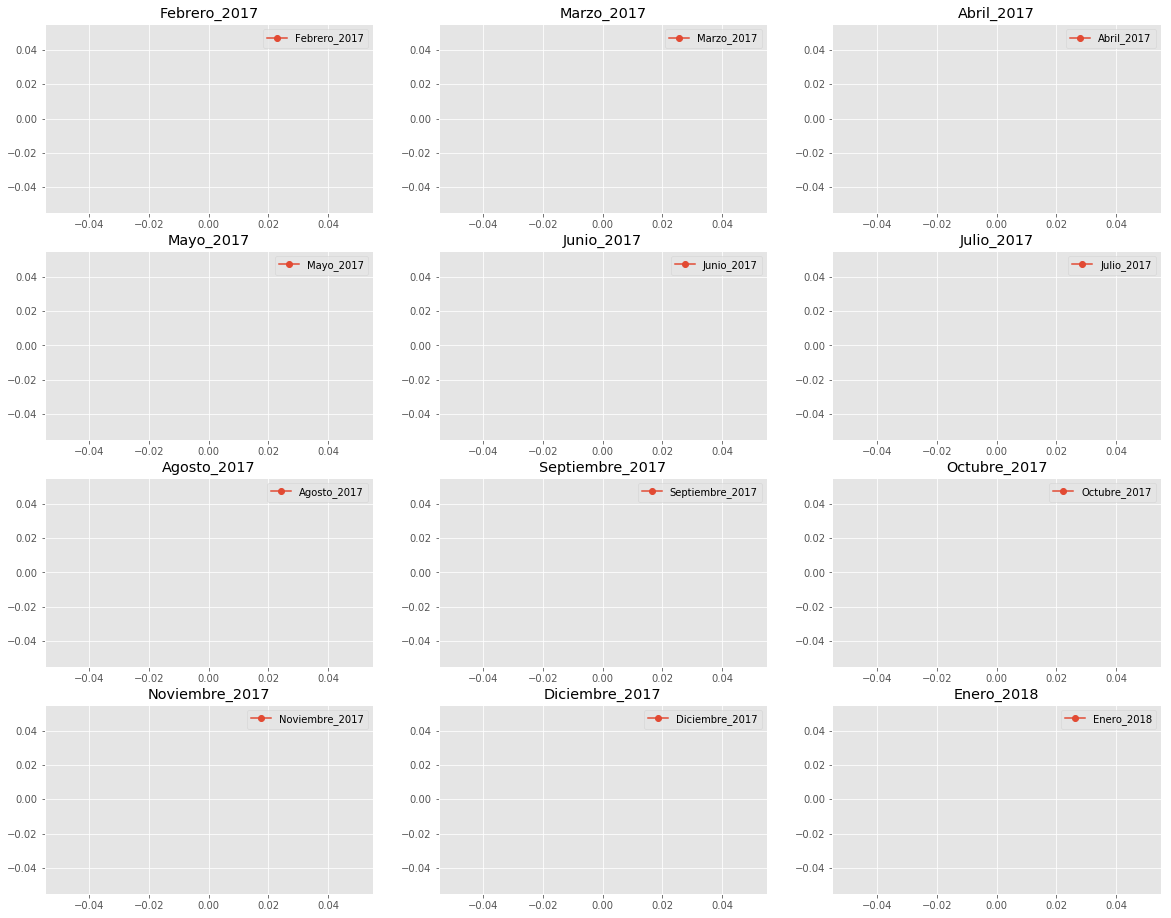

In [54]:
### Gráficar el precio del NAV durante el último año para cada mes
fig,axes = plt.subplots(4,3,figsize=(20,16))
axes[0,0].set_title(Nombres_archivos[0])
axes[0,0].plot(dic_precios_nav[meses[0]],"o-",label=Nombres_archivos[0])
axes[0,0].legend(loc="best")
axes[0,1].set_title(Nombres_archivos[1])
axes[0,1].plot(dic_precios_nav[meses[1]],"o-",label=Nombres_archivos[1])
axes[0,1].legend(loc="best")
axes[0,2].set_title(Nombres_archivos[2])
axes[0,2].plot(dic_precios_nav[meses[2]],"o-",label=Nombres_archivos[2])
axes[0,2].legend(loc="best")
axes[1,0].set_title(Nombres_archivos[3])
axes[1,0].plot(dic_precios_nav[meses[3]],"o-",label=Nombres_archivos[3])
axes[1,0].legend(loc="best")
axes[1,1].set_title(Nombres_archivos[4])
axes[1,1].plot(dic_precios_nav[meses[4]],"o-",label=Nombres_archivos[4])
axes[1,1].legend(loc="best")
axes[1,2].set_title(Nombres_archivos[5])
axes[1,2].plot(dic_precios_nav[meses[5]],"o-",label=Nombres_archivos[5])
axes[1,2].legend(loc="best")
axes[2,0].set_title(Nombres_archivos[6])
axes[2,0].plot(dic_precios_nav[meses[6]],"o-",label=Nombres_archivos[6])
axes[2,0].legend(loc="best")
axes[2,1].set_title(Nombres_archivos[7])
axes[2,1].plot(dic_precios_nav[meses[7]],"o-",label=Nombres_archivos[7])
axes[2,1].legend(loc="best")
axes[2,2].set_title(Nombres_archivos[8])
axes[2,2].plot(dic_precios_nav[meses[8]],"o-",label=Nombres_archivos[8])
axes[2,2].legend(loc="best")
axes[3,0].set_title(Nombres_archivos[9])
axes[3,0].plot(dic_precios_nav[meses[9]],"o-",label=Nombres_archivos[9])
axes[3,0].legend(loc="best")
axes[3,1].set_title(Nombres_archivos[10])
axes[3,1].plot(dic_precios_nav[meses[10]],"o-",label=Nombres_archivos[10])
axes[3,1].legend(loc="best")
axes[3,2].set_title(Nombres_archivos[11])
axes[3,2].plot(dic_precios_nav[meses[11]],"o-",label=Nombres_archivos[11])
axes[3,2].legend(loc="best")
plt.show()

## <font color="red">Política de rebalanceo de pesos

$$\text{Se tomarán a consideración 3 distintas políticas de rebalanceo. Se sabe con anterioridad, que cada activo en el ETF con}$$
$$\text{cual se está trabajando, se rebalancea de manera periódica según la capitalización de cada activo en el mercado, por lo}$$
$$\text{tanto, aquellos activos que tengan mayor rendimiento o una nueva emisión de acciones tendrán una mayor ponderación en el portafolio.}$$

$$\text{Sin embargo, esto puede llegar a sesgar un poco el comportamiento del portafolio a largo plazo, pues existe una gran}$$
$$\text{ posibilidad de que los activos con mayor capitalización en el mercado no tengan mucha variación en el precio y su}$$
$$\text{capitalización se mantenga constante provocando un rendimiento nulo, pero una ponderación significativa en el portafolio que no sufre}$$
$$\text{penalización alguna por su falta de efectividad en dicho portafolio. Por lo mismo, hemos decidido aplicar las 3}$$ $$\text{siguientes 3 políticas de rebalanceo para el ETF en el cuál se está trabajando.}$$

<font color="blue"> Perfil Agresivo (Maximizar Rendimiento)</font>
- **Se tomará el 10% de los activos que hubiesen tenído el peor desempeño durante el mes y se les disminuirá su participación en un 15%. Los activos que hubiesen tenido un rendimiento superior (el 10% de los activos que conforman el portafolio) se les asignará de manera ponderada el 15% del peso que se les quitó a los de peor rendimiento.** 

<font color="blue"> Perfil  Conservador (Minimizar pérdida) </font>
- **Se tomará el 10% de los activos que hubiesen tenido la mayor volatilidad durante el mes y se les disminuirá su participación en u 15%. Los activos que hubiesen tenido una volatilidad menor (el 10%) se les sumara de manera ponderada el 15% que se les quitó a los de mayor volatilidad**

<font color="blue"> Maximizar el Radio de Sharp  </font>
- **Se maximizará el Radio de Sharp**


In [ ]:
### Gráfica de la volatilidad del NAV durante cada mes
volatilidades = []
for k in dic_precios_nav.columns.values:
    volatilidades.append(np.std(dic_precios_nav[k]))
fig,ax = plt.subplots()
ax.scatter(volatilidades)
ax.set_title("Volatilidad mes por mes con precios diarios")
plt.show()

<font color="blue"> Perfil Agresivo (Maximizar Rendimiento)</font>

<font color="blue"> Perfil  Conservador (Minimizar pérdida) </font>

<font color="blue"> Maximizar el Radio de Sharp  </font>

### <center><font color="green"> Modelos Predictivos 
    
<center>Utilizaremos 2 herramientas distintas (regresión y clasificación) de apoyo para predecir una vez dados los pesos del portafolio cual será el precio promedio del ETF durate el siguiente mes (mediante una regresión lineal multiple) y saber si se mantendrá positivo o negativo (Mediante una Maquina Soporte Vector(SVM).

,AAPL,MSFT,XOM,AMZN,JNJ,BRKB,JPM,FB,GE,WFC,...,UAA,SWN,FTR,UA,AN,FSLR,ENDP,URBN,UBFUT,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2017-02-28,131.823517,61.196365,73.312630,845.039978,114.323029,171.42,84.645416,135.539993,26.644691,53.439133,...,20.620001,7.51,36.807011,18.559999,45.900002,36.189999,13.65,26.030001,100.0,12.728239
2017-03-01,134.517914,62.114594,74.845207,853.080017,115.866539,171.42,87.428940,137.419998,26.984341,55.147194,...,20.600000,7.72,36.681385,18.580000,46.610001,35.020000,12.82,25.480000,100.0,12.921090
2017-03-02,133.719223,61.225063,75.097641,848.909973,115.651382,171.42,86.065193,136.759995,26.984341,54.205448,...,20.930000,7.59,35.299553,18.959999,46.439999,35.520000,12.29,26.930000,100.0,12.776451
2017-03-03,134.508286,61.454613,74.340355,849.880005,115.801071,171.42,86.681679,137.169998,26.921770,54.371643,...,20.590000,7.71,36.053284,18.639999,45.820000,34.610001,12.25,26.059999,100.0,12.776451
2017-03-06,134.084869,61.473736,74.673927,846.609985,115.726227,171.42,85.859703,137.419998,26.814516,54.113125,...,20.049999,7.94,34.671444,18.309999,45.330002,33.330002,11.40,25.680000,100.0,12.776451
2017-03-07,134.258087,61.598091,74.394447,846.020020,115.838493,171.42,85.383331,137.300003,26.689381,53.826900,...,19.690001,7.61,32.912750,18.110001,45.259998,32.630001,10.90,25.410000,100.0,12.535387
2017-03-08,133.757706,62.162415,73.051163,850.500000,116.091049,171.42,85.196510,137.720001,26.635752,53.743813,...,19.139999,7.46,31.279673,17.750000,45.490002,32.660000,10.80,24.750000,100.0,12.342534
2017-03-09,133.449783,61.913727,73.628151,853.000000,117.821663,171.42,85.532761,138.240005,26.510618,54.196213,...,19.150000,7.46,32.661503,17.690001,44.700001,32.480000,10.53,24.719999,100.0,12.342534
2017-03-10,133.892441,62.105022,73.574059,852.460022,118.064896,171.42,85.261902,138.789993,27.064785,54.334702,...,19.260000,7.44,33.540855,17.750000,44.840000,32.400002,10.82,25.170000,100.0,12.342534


In [53]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).dropna()